In [25]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
import random

In [ ]:
def rand():


    
    #same as comp but for specific components if we want to do that
    N = int(np.random.uniform(low=1, high=20))  
    pct = np.random.uniform(low=10, high=60)

    boardWidth = 50 #5 cm // 50 mm // X
    boardHeight = 50 #5 cm // 50 mm // Y

    components = {}
    componentPosition = []  # Store (x, y, width, height)
    
    # specific components
    electronics = {
        'block1': {'min_w': 3, 'max_w': 20, 'min_h': 3, 'max_h': 40, 'color': 'lightblue'},
        'block2': {'min_w': 3, 'max_w': 20, 'min_h': 3, 'max_h': 40, 'color': 'silver'},
        'block3': {'min_w': 3, 'max_w': 20, 'min_h': 3, 'max_h': 40, 'color': 'gold'},
        'block4': {'min_w': 3, 'max_w': 20, 'min_h': 3, 'max_h': 40, 'color': 'red'},
        'block5': {'min_w': 3, 'max_w': 20, 'min_h': 3, 'max_h': 40, 'color': 'lightgreen'}
    }
    
    for i in range(N):
        # random component from above ^^^
        comp_type = random.choice(list(electronics.keys())) 
        info = electronics[comp_type]
        
        # random dimensions based on info given
        width = np.random.uniform(low=info['min_w'], high=info['max_w'])
        height = np.random.uniform(low=info['min_h'], high=info['max_h'])
        
        # try to place component
        maxIter = 100
        placed = 0
        buffer = 1  # spacing between components
        
        for attempt in range(maxIter):
            x = np.random.uniform(low=buffer, high=boardWidth - width - buffer)
            y = np.random.uniform(low=buffer, high=boardHeight - height - buffer)
            
            # Check collisions with buffer
            collision = 0
            for comp_x, comp_y, comp_w, comp_h in componentPosition:
                if ((x - buffer < comp_x + comp_w + buffer) and (x + width + buffer > comp_x - buffer) and (y - buffer < comp_y + comp_h + buffer) and (y + height + buffer > comp_y - buffer)):
                    collision = 1
                    break
            
            if collision == 0:
                components[f'{comp_type}_{i}'] = {
                    'type': comp_type,  
                    'position': (x, y), 
                    'dimensions': (width, height, 1.0), 
                    'bounds': (x, y, x + width, y + height),
                    'color': info['color']  # Store the color with the component
                }
                componentPosition.append((x, y, width, height))
                placed = 1
                break
    
    return components, boardWidth, boardHeight



In [27]:
def plot(components, boardWidth, boardHeight):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
        
    # Draw board
    board = patches.Rectangle((0, 0), boardWidth, boardHeight, linewidth=2, edgecolor='black', facecolor='lightgray')
    ax.add_patch(board)
        
    for name, comp in components.items():
        comp_type = comp.get('type', 'unknown')
        color = comp.get('color', 'gray')  
            
        x, y = comp['position']
        width, height, _ = comp['dimensions']
            
        rect = patches.Rectangle((x, y), width, height,linewidth=1, edgecolor='black', facecolor=color, alpha=0.7)
        ax.add_patch(rect)
            
        # Add label
        label = name.split('_')[0]
        ax.text(x + width/2, y + height/2, label, ha='center', va='center', fontsize=8)
        
    ax.set_xlim(-5, boardWidth + 5)
    ax.set_ylim(-5, boardHeight + 5)
    ax.set_aspect('equal')
    ax.set_title('Circuit Board Components Layout')
    ax.set_xlabel('Width (mm)')
    ax.set_ylabel('Height (mm)')
    plt.grid(True, alpha=0.3)
    plt.show()

Generated 6 components


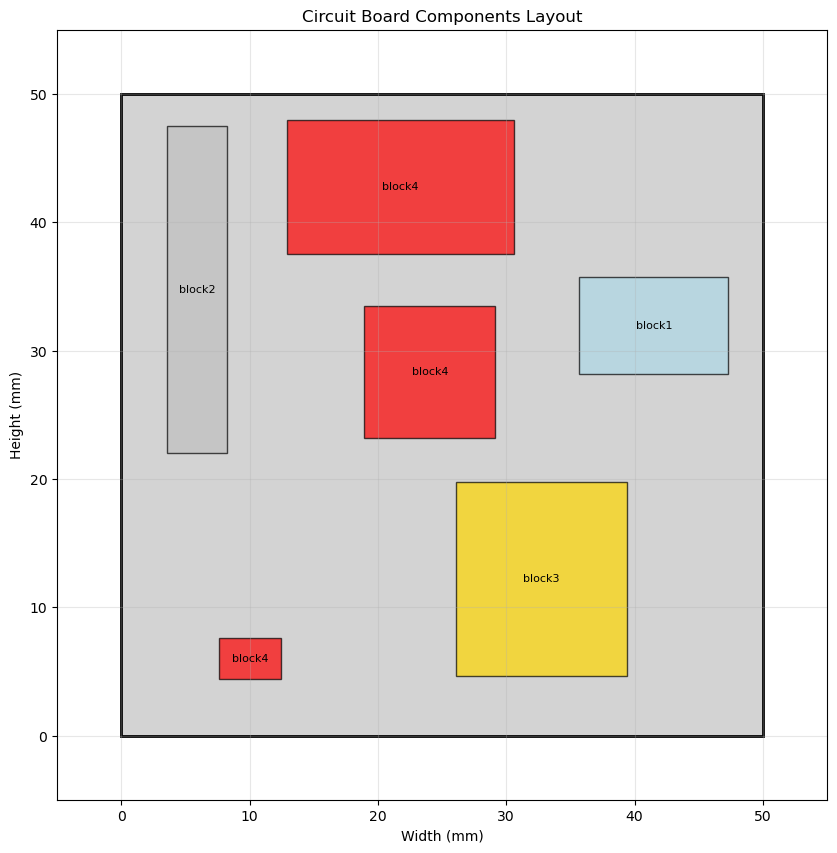

In [28]:
components, boardWidth, boardHeight = rand()
print(f"Generated {len(components)} components")
plot(components, boardWidth, boardHeight)
